In [6]:
from collections import OrderedDict
from math import log, sqrt

import numpy as np
import pandas as pd
from six.moves import cStringIO as StringIO
from bokeh.io import output_notebook, push_notebook, show
from bokeh.plotting import figure, show, output_file

antibiotics = """
bacteria,                        penicillin, streptomycin, neomycin, gram
Mycobacterium tuberculosis,      800,        5,            2,        negative
Salmonella schottmuelleri,       10,         0.8,          0.09,     negative
Proteus vulgaris,                3,          0.1,          0.1,      negative
Klebsiella pneumoniae,           850,        1.2,          1,        negative
Brucella abortus,                1,          2,            0.02,     negative
Pseudomonas aeruginosa,          850,        2,            0.4,      negative
Escherichia coli,                100,        0.4,          0.1,      negative
Salmonella (Eberthella) typhosa, 1,          0.4,          0.008,    negative
Aerobacter aerogenes,            870,        1,            1.6,      negative
Brucella antracis,               0.001,      0.01,         0.007,    positive
Streptococcus fecalis,           1,          1,            0.1,      positive
Staphylococcus aureus,           0.03,       0.03,         0.001,    positive
Staphylococcus albus,            0.007,      0.1,          0.001,    positive
Streptococcus hemolyticus,       0.001,      14,           10,       positive
Streptococcus viridans,          0.005,      10,           40,       positive
Diplococcus pneumoniae,          0.005,      11,           10,       positive
"""

drug_color = OrderedDict([
    ("Penicillin",   "#0d3362"),
    ("Streptomycin", "#c64737"),
    ("Neomycin",     "black"  ),
])

gram_color = OrderedDict([
    ("negative", "#e69584"),
    ("positive", "#aeaeb8"),
])

df = pd.read_csv(StringIO(antibiotics),
                 skiprows=1,
                 skipinitialspace=True,
                 engine='python')

width = 800
height = 800
inner_radius = 90
outer_radius = 300 - 10

minr = sqrt(log(.001 * 1E4))
maxr = sqrt(log(1000 * 1E4))
a = (outer_radius - inner_radius) / (minr - maxr)
b = inner_radius - a * maxr

def rad(mic):
    return a * np.sqrt(np.log(mic * 1E4)) + b

big_angle = 2.0 * np.pi / (len(df) + 1)
small_angle = big_angle / 7

p = figure(plot_width=width, plot_height=height, title="",
    x_axis_type=None, y_axis_type=None,
    x_range=(-420, 420), y_range=(-420, 420),
    min_border=0, outline_line_color="black",
    background_fill_color="#f0e1d2")

p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

# annular wedges
angles = np.pi/2 - big_angle/2 - df.index.to_series()*big_angle
colors = [gram_color[gram] for gram in df.gram]
p.annular_wedge(
    0, 0, inner_radius, outer_radius, -big_angle+angles, angles, color=colors,
)

# small wedges
p.annular_wedge(0, 0, inner_radius, rad(df.penicillin),
                -big_angle+angles+5*small_angle, -big_angle+angles+6*small_angle,
                color=drug_color['Penicillin'])
p.annular_wedge(0, 0, inner_radius, rad(df.streptomycin),
                -big_angle+angles+3*small_angle, -big_angle+angles+4*small_angle,
                color=drug_color['Streptomycin'])
p.annular_wedge(0, 0, inner_radius, rad(df.neomycin),
                -big_angle+angles+1*small_angle, -big_angle+angles+2*small_angle,
                color=drug_color['Neomycin'])

# circular axes and lables
labels = np.power(10.0, np.arange(-3, 4))
radii = a * np.sqrt(np.log(labels * 1E4)) + b
p.circle(0, 0, radius=radii, fill_color=None, line_color="white")
p.text(0, radii[:-1], [str(r) for r in labels[:-1]],
       text_font_size="8pt", text_align="center", text_baseline="middle")

# radial axes
p.annular_wedge(0, 0, inner_radius-10, outer_radius+10,
                -big_angle+angles, -big_angle+angles, color="black")

# bacteria labels
xr = radii[0]*np.cos(np.array(-big_angle/2 + angles))
yr = radii[0]*np.sin(np.array(-big_angle/2 + angles))
label_angle=np.array(-big_angle/2+angles)
label_angle[label_angle < -np.pi/2] += np.pi # easier to read labels on the left side
p.text(xr, yr, df.bacteria, angle=label_angle,
       text_font_size="9pt", text_align="center", text_baseline="middle")

# OK, these hand drawn legends are pretty clunky, will be improved in future release
p.circle([-40, -40], [-370, -390], color=list(gram_color.values()), radius=5)
p.text([-30, -30], [-370, -390], text=["Gram-" + gr for gr in gram_color.keys()],
       text_font_size="7pt", text_align="left", text_baseline="middle")

p.rect([-40, -40, -40], [18, 0, -18], width=30, height=13,
       color=list(drug_color.values()))
p.text([-15, -15, -15], [18, 0, -18], text=list(drug_color),
       text_font_size="9pt", text_align="left", text_baseline="middle")

#output_file("burtin.html", title="burtin.py example")
#output_notebook()
show(p)

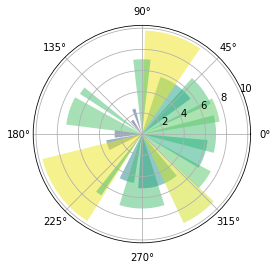

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Fixing random state for reproducibility
np.random.seed(19680801)

# Compute pie slices
N = 20
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = 10 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)
colors = plt.cm.viridis(radii / 10.)

ax = plt.subplot(111, projection='polar')
ax.bar(theta, radii, width=width, bottom=0.0, color=colors, alpha=0.5)

plt.show()

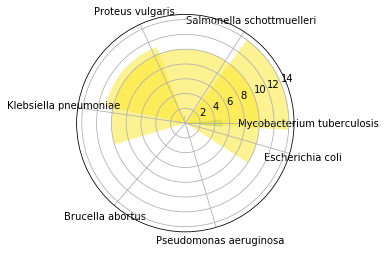

In [12]:
# Compute pie slices
import pandas as pd

df = pd.read_csv('Antibiotics.csv')
theta = df['bacteria']
radii = df['streptomycin']
width = df['neomycin']/10
colors = plt.cm.viridis(radii / 10.)

ax = plt.subplot(111, projection='polar')
ax.bar(theta, radii, width=width, bottom=0.0, color=colors, alpha=0.5)

plt.show()

In [4]:
np.pi / 4 * np.random.rand(7)

array([0.17344481, 0.7328188 , 0.38405872, 0.37284315, 0.07003197,
       0.18060088, 0.56229593])